In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [ ]:
bmobile_data = pd.read_csv("/content/best-selling-mobile-phones.csv")
mobile_data.sort_values(by = ["year"], axis = 0, ascending = True, inplace = True)
mobile_data.head()

,manufacturer,model,form,smartphone,year,units_sold_m
28,Motorola,StarTAC,Flip phone,No,1996,60.0
6,Nokia,3210,Bar,No,1999,161.0
18,Nokia,3310 (3330),Bar,No,2000,126.0
0,Nokia,1100,Bar,No,2003,250.0
82,Samsung,SGH-E700,Flip phone,No,2003,10.0


# 1) What is the most popular phone sold each year?

In [ ]:
phone_by_year = mobile_data.groupby(by=['year']).apply(lambda group: group.nlargest(1, columns='units_sold_m')).reset_index(level=-1, drop=True)

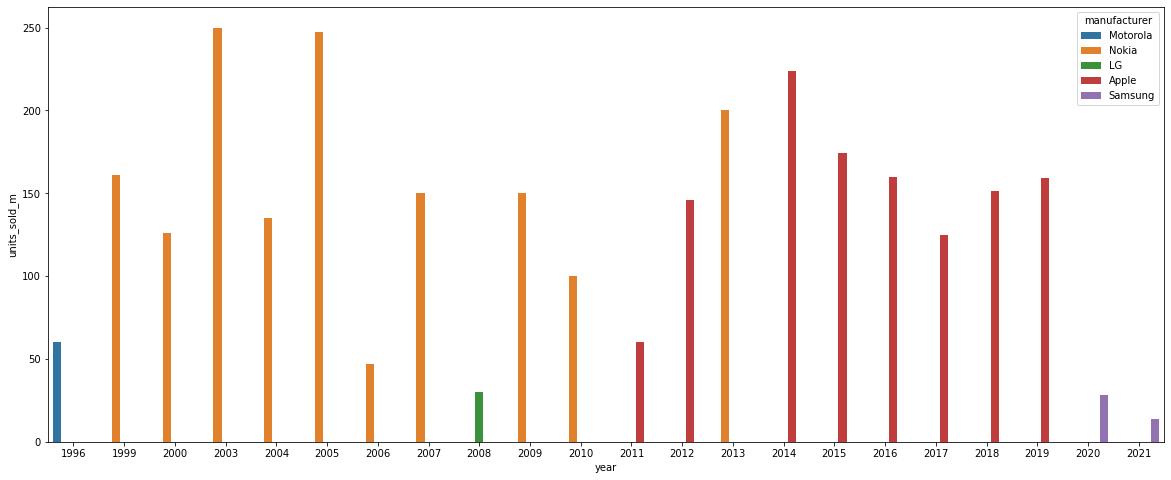

In [ ]:
fig = plt.figure(figsize = (20, 8))
ax = plt.subplot(111)
ax = sns.barplot(x=phone_by_year.index, y=phone_by_year['units_sold_m'], hue=phone_by_year['manufacturer'])

From the barplot above, we can see that before year 2011, the most popular phone brand bought was Nokia. From 2011 onwards, the most popular phone brand bought was Apple.

# 2) Number of models each brand manufactured from 1996 to 2021

Text(0.5, 1.0, 'Count of models of each phone brand')

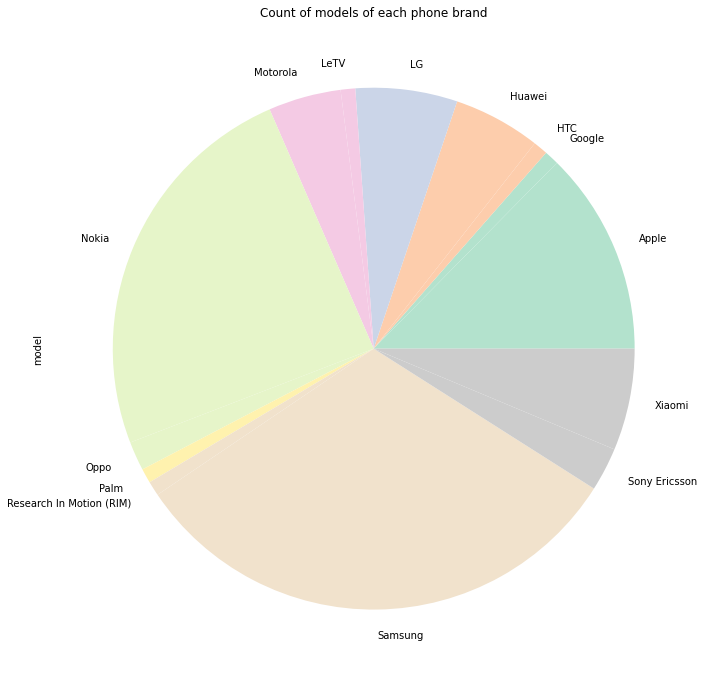

In [ ]:
num_models = mobile_data.groupby(by=['manufacturer'])['model'].count()
plt.figure(figsize=(20,12))
num_models.plot.pie(cmap='Pastel2')
plt.title("Count of models of each phone brand")

Top 3 companies that produced the most number of different phone models from 1996 to 2021 are Samsung, Nokia and Apple.

# 3 Distributions of number of phone sold for each brand

In [ ]:
pd.pivot_table(mobile_data, values='units_sold_m', index=['manufacturer','model'])

units_sold_m
manufacturer             model                                                       
Apple                    iPhone                                                   6.0
                         iPhone 11, iPhone 11 Pro and iPhone 11 Pro Max         159.2
                         iPhone 3GS                                              35.0
                         iPhone 4                                                50.0
                         iPhone 4S                                               60.0
                         iPhone 5                                               146.2
                         iPhone 5S                                              164.5
                         iPhone 6 and iPhone 6 Plus                             224.0
                         iPhone 6S and iPhone 6S Plus                           174.1
                         iPhone 7 and iPhone 7 Plus                             159.9
                         iPhone 8 and iPhone 8 Plus                             124.7
                         iPhone SE (2nd generation)                              24.2
                         iPhone X                                                63.0
                         iPhone XR, iPhone XS and iPhone XS Max                 151.1
Google                   Pixel and Pixel XL                                       2.1
HTC                      Thunderbolt                                             16.0
Huawei                   Mate 10 and Mate 10 Pro                                 17.0
                         Mate 20 and Mate 20 Pro                                 17.0
                         Mate 30 and Mate 30 Pro                                 12.0
                         Mate 9                                                  15.8
                         P20, P20 Pro and P20 Lite                               32.0
                         P30 and P30 Pro                                         20.0
LG                       Chocolate VX8500                                        21.0
                         Cookie (KP500)                                          13.0
                         G2                                                       3.0
                         G3                                                      10.0
                         KP100                                                   30.0
                         Shine                                                   10.0
                         Viewty (KU990)                                           5.0
LeTV                     LeEco Le 1s                                              3.0
Motorola                 C139                                                    60.0
                         C200                                                    60.0
                         Droid Bionic                                            13.0
                         RAZR V3                                                130.0
                         StarTAC                                                 60.0
Nokia                    105 (2013), 105 (2015)                                 200.0
                         1100                                                   250.0
                         1110                                                   247.5
                         1200                                                   150.0
                         1208 (1209)                                            100.0
                         1280                                                   100.0
                         1600 (1650/1661)                                       130.0
                         2100                                                    20.0
                         2600 (2610/2626/2630)                                  135.0
                         2650                                                    35.0
                         3100 (

Text(0.5, 1.0, 'Distributions of units sold in millions')

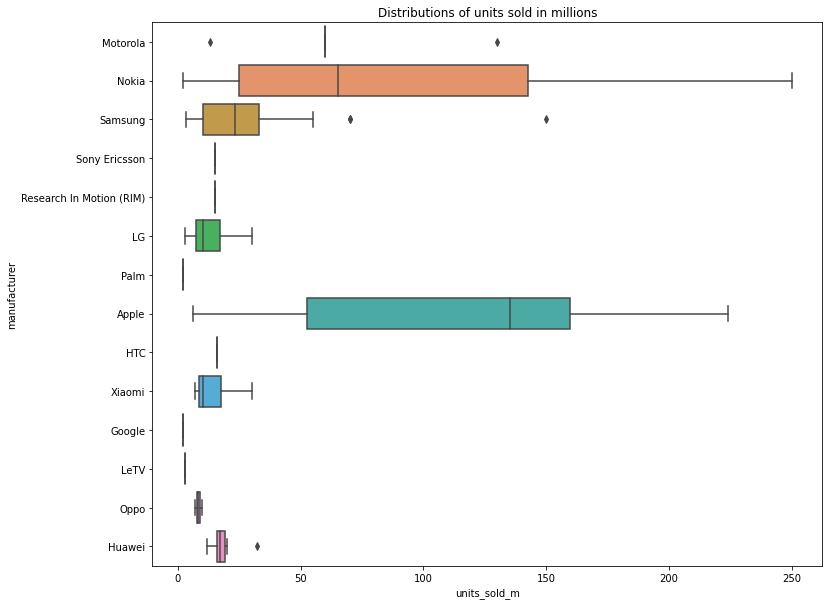

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x='units_sold_m', y='manufacturer', orient='h', data=mobile_data)
plt.title("Distributions of units sold in millions")

# 4) From the stacked barplot below, we can see that touch screen phone started taking over the phone scene from 2010 onwards.

In [ ]:
form_data = mobile_data.groupby(['year', 'form'])['model'].count().unstack('form').fillna(0)

Text(0.5, 1.0, 'Type of phones over the years')

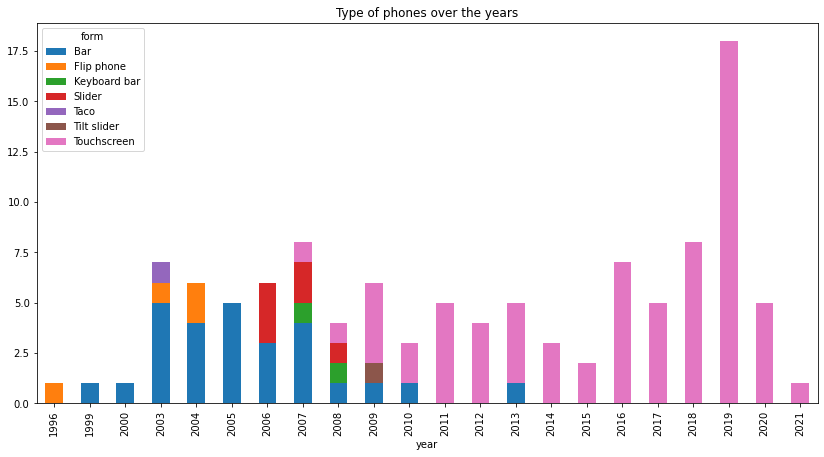

In [ ]:
form_data.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title("Type of phones over the years")

# 5) From the stacked barplot below, we can see that smartphones started taking over the phone scene from 2010 onwards.

In [ ]:
smartphone_data = mobile_data.groupby(['year', 'smartphone'])['model'].count().unstack('smartphone').fillna(0)

Text(0.5, 1.0, 'Smartphone transition over the years')

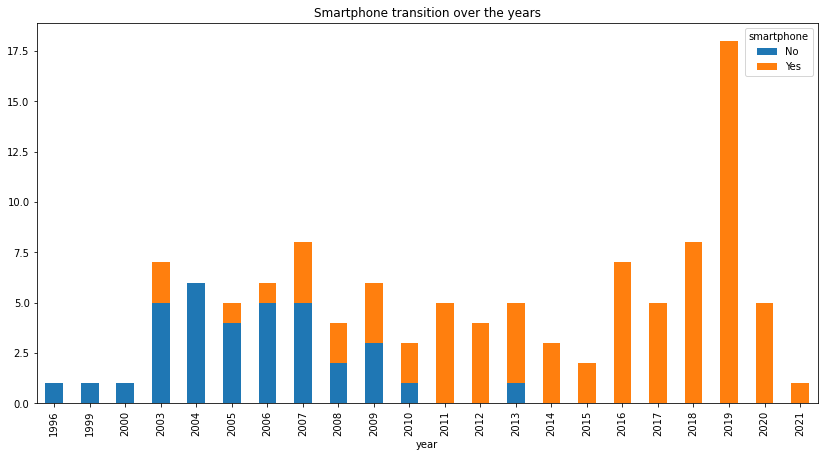

In [ ]:
smartphone_data.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title("Smartphone transition over the years")